In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, \
    classification_report, roc_curve, auc, precision_recall_curve

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import RandomOverSampler

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

# Data Preparation

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df[:5]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.isna().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [8]:
print('Categorical variables:', [i for i in df.columns if df[i].dtype=='O'])

Categorical variables: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
print('Numerical variables:', [i for i in df.columns if df[i].dtype=='float64'])

Numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Here we are getting rid of outliers:**

In [11]:
for i in df.columns:
    if df[i].dtype=='float64':
        IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
        top = df[i].quantile(0.75) + (IQR * 1.5)
        bot = df[i].quantile(0.25) - (IQR * 1.5)
        
        df[i] = np.where(df[i]>top, top, df[i])
        df[i] = np.where(df[i]<bot, bot, df[i])

In [12]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,89572.000000,86102.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,7.611178,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,3.785483,12.981866,8.607783,8.532467,18.876608,20.795902,7.025447,6.976954,2.887159,2.720357,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000


**Below we are filling median (for *float* or *int*) or None (for *object*) instead of *NaN* values**

In [13]:
def fillna(series: pd.Series) -> pd.Series:
    """
    A function that fills "None"
    for categorical and numeric data
    """
    if (series.dtype is np.dtype(float)) | (series.dtype is np.dtype(int)):
        return series.fillna(series.median())
    elif series.dtype is np.dtype(object):
        if series.mode()[0]!=None:
            return series.fillna(series.mode()[0])
        else:
            return series.fillna('None')
    else:
        return series

In [14]:
df = df.apply(fillna)

In [15]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
df.drop('Date', axis=1, inplace = True)

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [19]:
df['RainToday'] = np.where(df['RainToday']=='No', 0, 1)

In [20]:
df['RainTomorrow'] = np.where(df['RainTomorrow']=='No', 0, 1)

**Below we can see imbalance in the target value**

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

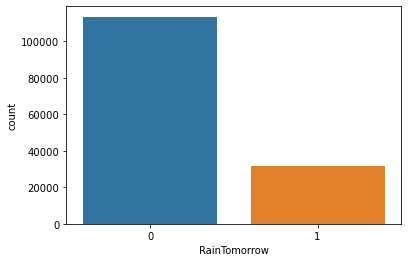

In [21]:
sns.countplot(data = df, x=df.RainTomorrow)

In [22]:
df.RainTomorrow.value_counts() / df.shape[0]*100

0    78.085384
1    21.914616
Name: RainTomorrow, dtype: float64

In [23]:
str_cols = df.dtypes[df.dtypes==object].index

In [24]:
df = pd.get_dummies(df, columns=str_cols)

In [25]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [27]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline

In [28]:
lg = LogisticRegression(penalty=None, max_iter=400)
lg.fit(X_train,y_train)


y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1:]

In [29]:
def metrics_all(X_test,y_test, y_pred):
    """
    Function returns ROC-AUC, precision,
    recall, f1, logloss
    """
    roc_auc = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    
    return roc_auc, precision, recall, f1, logloss

In [30]:
roc_auc, precision, recall, f1, logloss = metrics_all(X_test,y_test, y_pred)

print('roc-auc:', roc_auc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('logloss:', logloss)

roc-auc: 0.8694516367136204
precision: 0.7168523176428315
recall: 0.5006901744259004
f1: 0.5895825637236793
logloss: 5.5059121291501665


In [31]:
metrics_df = pd.DataFrame(index=['ROC-AUC', 'Precision', 'Recall', 'F1', 'Logloss'])
metrics_df['Baseline'] = [roc_auc, precision, recall, f1, logloss]

In [32]:
metrics_df

,Baseline
ROC-AUC,0.869452
Precision,0.716852
Recall,0.500690
F1,0.589583
Logloss,5.505912


In [33]:
def ROC_AUC_plot(y_test, y_score):
    """
    ROC_AUC plot function
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

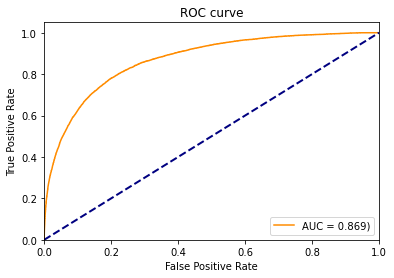

In [34]:
ROC_AUC_plot(y_test, y_score)

# class_weight='balanced'

In [35]:
lg = LogisticRegression(class_weight='balanced', max_iter=400)
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1:]

In [36]:
roc_auc, precision, recall, f1, logloss = metrics_all(X_test,y_test, y_pred)

print('roc-auc:', roc_auc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('logloss:', logloss)

roc-auc: 0.8700257244179979
precision: 0.5206604643366022
recall: 0.7795206424896474
f1: 0.6243216080402011
logloss: 7.4099368276375595


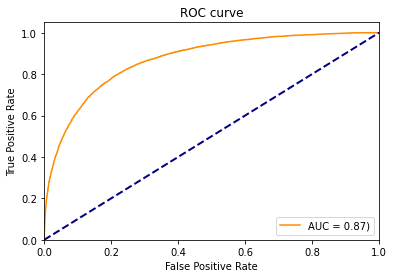

In [37]:
ROC_AUC_plot(y_test, y_score)

In [38]:
metrics_df['Use class_weight'] = [roc_auc, precision, recall, f1, logloss]

In [39]:
metrics_df

,Baseline,Use class_weight
ROC-AUC,0.869452,0.870026
Precision,0.716852,0.520660
Recall,0.500690,0.779521
F1,0.589583,0.624322
Logloss,5.505912,7.409937


# RandomOverSampler

In [40]:
oversample = RandomOverSampler(sampling_strategy=1.0)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [41]:
lg = LogisticRegression(penalty=None, max_iter=400)
lg.fit(X_over, y_over)

y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1:]

In [42]:
roc_auc, precision, recall, f1, logloss = metrics_all(X_test,y_test, y_pred)

print('roc-auc:', roc_auc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('logloss:', logloss)

roc-auc: 0.8700611350883533
precision: 0.521286422033756
recall: 0.779018697452629
f1: 0.62461012174263
logloss: 7.3960605414434815


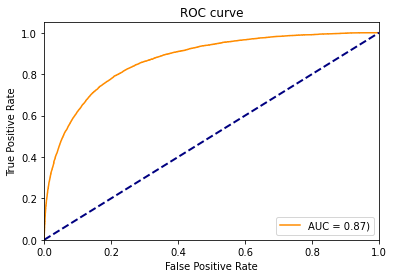

In [43]:
ROC_AUC_plot(y_test, y_score)

# RandomUnderSampler

In [44]:
undersample = RandomUnderSampler(sampling_strategy=1.0) 
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [45]:
lg = LogisticRegression(penalty=None, max_iter=400)
lg.fit(X_under, y_under)

y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1:]

In [46]:
roc_auc, precision, recall, f1, logloss = metrics_all(X_test,y_test, y_pred)

print('roc-auc:', roc_auc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('logloss:', logloss)

roc-auc: 0.8695354901355585
precision: 0.5194816053511706
recall: 0.779646128748902
f1: 0.6235134728285414
logloss: 7.436698236726137


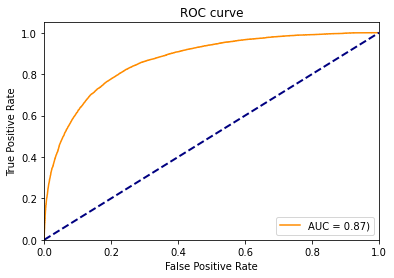

In [47]:
ROC_AUC_plot(y_test, y_score)

In [48]:
metrics_df['UnderSampling'] = [roc_auc, precision, recall, f1, logloss]

# SMOTE

In [49]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [50]:
lg = LogisticRegression(penalty=None, max_iter=400)
lg.fit(X_smote, y_smote)

y_pred = lg.predict(X_test)
y_score = lg.predict_proba(X_test)[:,1:]

In [51]:
roc_auc, precision, recall, f1, logloss = metrics_all(X_test,y_test, y_pred)

print('roc-auc:', roc_auc)
print('precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('logloss:', logloss)

roc-auc: 0.8692555058797622
precision: 0.5226519337016574
recall: 0.7716150081566069
f1: 0.6231884057971016
logloss: 7.370290295654479


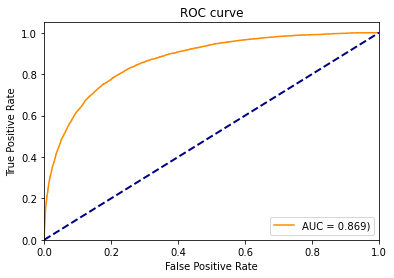

In [52]:
ROC_AUC_plot(y_test, y_score)

In [53]:
metrics_df['SMOTE OverSampling'] = [roc_auc, precision, recall, f1, logloss]

# Final results (classification metrics)

In [54]:
metrics_df

,Baseline,Use class_weight,UnderSampling,SMOTE OverSampling
ROC-AUC,0.869452,0.870026,0.869535,0.869256
Precision,0.716852,0.520660,0.519482,0.522652
Recall,0.500690,0.779521,0.779646,0.771615
F1,0.589583,0.624322,0.623513,0.623188
Logloss,5.505912,7.409937,7.436698,7.370290


In [55]:
metrics_df.T.iloc[:,:].style.highlight_max(axis=0, color='lightblue')

,ROC-AUC,Precision,Recall,F1,Logloss
Baseline,0.869452,0.716852,0.500690,0.589583,5.505912
Use class_weight,0.870026,0.520660,0.779521,0.624322,7.409937
UnderSampling,0.869535,0.519482,0.779646,0.623513,7.436698
SMOTE OverSampling,0.869256,0.522652,0.771615,0.623188,7.370290
